<a href="https://colab.research.google.com/github/lschimidtc/Kaggle-Data-Analysis/blob/main/Unicorn_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import main libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Dataset load
df = pd.read_csv('Startups+in+2021+end(Unicorn Case).csv')

#Dataset dimension
df.shape

(936, 8)

In [5]:
# First peak
df.head(5)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [6]:
df.tail(5)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"
935,935,Pet Circle,$1,12/7/2021,Australia,Alexandria,E-commerce & direct-to-consumer,"Prysm Capital, Baillie Gifford & Co., TDM Grow..."


In [7]:
# Columns
df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [62]:
# Rename
df.rename(columns={
    'Unnamed: 0' : 'Id',
 }, inplace=True )

In [63]:
#Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                936 non-null    int64         
 1   Company           936 non-null    object        
 2   Valuation ($B)    936 non-null    object        
 3   Date Joined       936 non-null    datetime64[ns]
 4   Country           936 non-null    object        
 5   City              921 non-null    object        
 6   Industry          936 non-null    object        
 7   Select Investors  935 non-null    object        
 8   Month             936 non-null    int64         
 9   Year              936 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 73.2+ KB


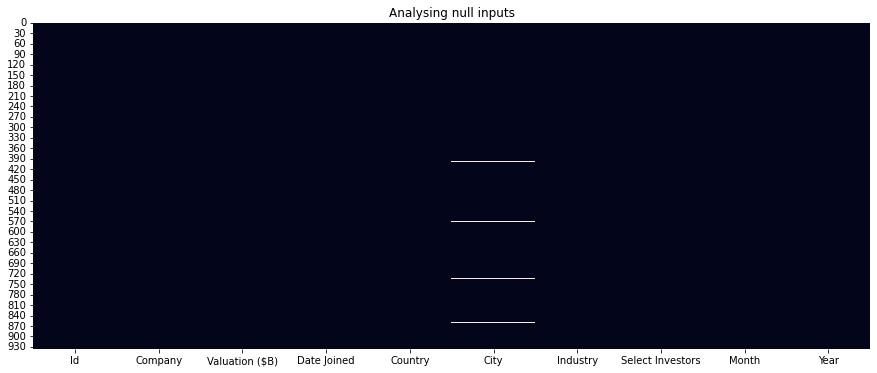

In [64]:
# Checking null values
plt.figure(figsize=(15,6))
plt.title('Analysing null inputs')
sns.heatmap(df.isnull(), cbar=False);

In [65]:
df.isnull().sum()

Id                   0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
Month                0
Year                 0
dtype: int64

In [66]:
# Unique inputs
df.nunique()

Id                  936
Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
Month                12
Year                 13
dtype: int64

In [67]:
# Unique values
df['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [68]:
df['Industry'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

In [69]:
df['Industry'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Industry, dtype: float64

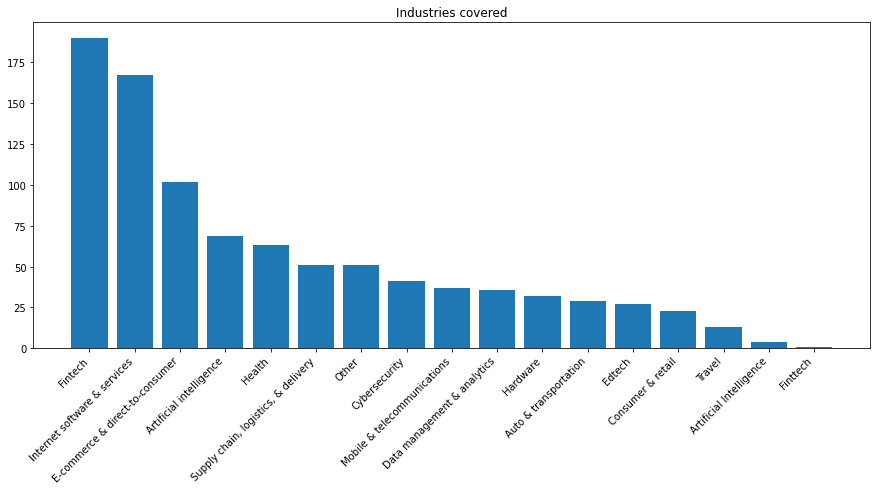

In [70]:
# Graphic view
plt.figure(figsize=(15,6))
plt.title('Industries covered')
plt.bar(df['Industry'].value_counts().index, df['Industry'].value_counts())
plt.xticks(rotation=45, ha='right');

In [71]:
round(df['Country'].value_counts(normalize=True) * 100, 1)

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

In [72]:
df_pie = round(df['Country'].value_counts(normalize=True) * 100, 1)

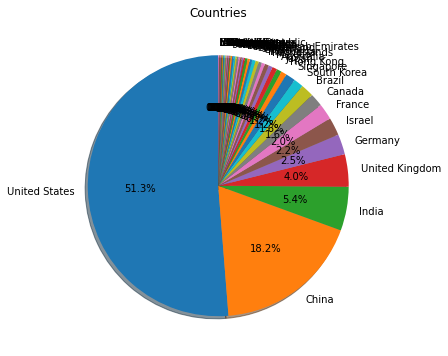

In [73]:
plt.figure(figsize=(15,6))
plt.title('Countries')
plt.pie(
    df_pie,
    labels = df_pie.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

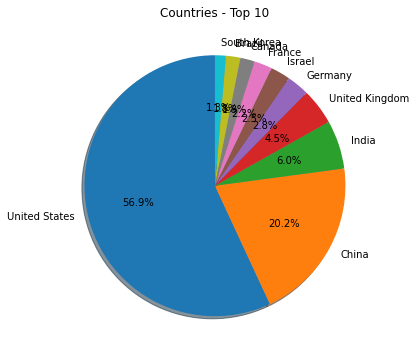

In [74]:
# Top 10
plt.figure(figsize=(15,6))
plt.title('Countries - Top 10')
plt.pie(
    df_pie.head(10),
    labels = df_pie.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [75]:
# Conversion 'Date Joined' object64 -> datetime64
df['Date Joined'] = pd.to_datetime(df['Date Joined']) 
df['Date Joined']

0     2017-04-07
1     2012-12-01
2     2014-01-23
3     2011-12-12
4     2018-01-08
         ...    
931   2021-12-06
932   2021-12-07
933   2021-12-01
934   2021-12-01
935   2021-12-07
Name: Date Joined, Length: 936, dtype: datetime64[ns]

In [76]:
# Extracting year and month (to columns)
df['Month'] = pd.DatetimeIndex(df['Date Joined']).month
df['Year'] = pd.DatetimeIndex(df['Date Joined']).year
df.head(5)

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [82]:
# Analytical table
analytical_table = df.groupby(by=['Country', 'Year', 'Month', 'Company']).count()['Id'].reset_index()

In [83]:
analytical_table.loc[
  analytical_table['Country'] == 'Brazil'
]

,Country,Year,Month,Company,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [86]:
# Cleaning 'Valuation ($B)' row and transforming to a numeric value (float64)
df['Valuation ($B)'] = pd.to_numeric(df['Valuation ($B)'].apply(lambda line: line.replace('$', '')))
df.head(5)

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [104]:
# Analytical table
analytical_table_country = df.groupby(by=['Country']).sum()['Valuation ($B)'].reset_index()
analytical_table_country.head()

,Country,Valuation ($B)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [105]:
analytical_table_values = analytical_table_country.sort_values('Valuation ($B)', ascending=False)
analytical_table_values.head(5)

,Country,Valuation ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


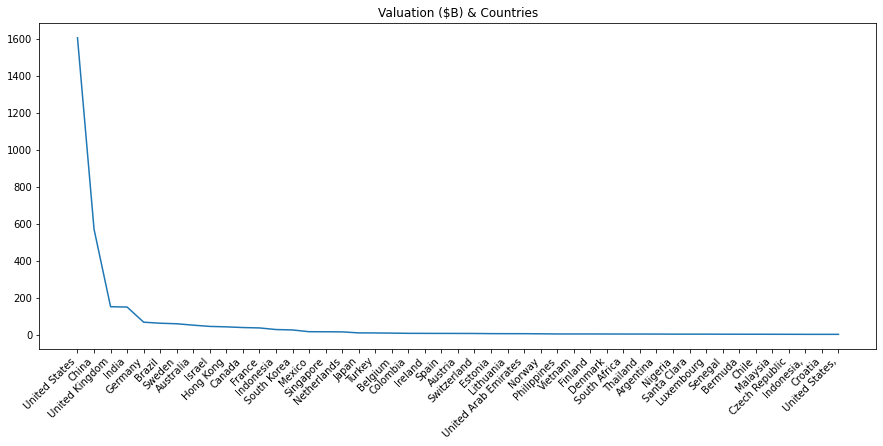

In [110]:
# Graphic view
plt.figure(figsize=(15,6))
plt.title('Valuation ($B) & Countries')
plt.plot(analytical_table_values['Country'], analytical_table_values['Valuation ($B)'])
plt.xticks(rotation=45, ha='right');